# Orbitales Atómicos

## Requisitos | Importar bibliotecas

In [20]:
import numpy as np
import scipy.special as sp
from scipy.constants import physical_constants
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

## Descripción de una función radial $R_{_{nl}}(r)$

La función radial describe el comportamiento del electrón en función de la distancia del núcleo, proporcionando un medio para visualizar la densidad de nubes de electrones a diferentes distancias del núcleo.

$$ R_{_{nl}}(r) = \sqrt{ \left(\frac{2}{na_0}\right)^{3} \frac{(n - l - 1)!}{2n(n + l)!} } \; e^{-\frac{r}{na_0}} \; \left( \frac{2r}{na_0} \right)^{l} \; L_{_{n-l-1}}^{^{2l+1}} \left( \frac{2r}{na_0} \right) $$

In [21]:
def radial_function(n, l, r, a0):
    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)
    constant_factor = (2 / (n**2)) * np.math.sqrt( np.math.factorial(n - l - 1) / np.math.factorial(n + l) / (a0**3) )

    return constant_factor * np.exp(-p / 2) * (p**l) * laguerre(p)

## Describir una función angular | Armónicos esféricos $Y_{_l}^{^m}(\theta, \varphi)$

The angular function is described by spherical harmonics and is a function of the polar angle $\theta$ and the azimuthal angle $\varphi$. The angular function gives the shape and orientation of the atomic orbitals.

$$ Y_{_l}^{^m}(\theta, \varphi) = (-1)^m \sqrt{ \frac{2l+1}{4\pi} \; \frac{(l-m)!}{(l+m)!} } \; P_{_l}^{^m} (\cos \theta) \; e^{im\varphi} $$

In [22]:
def angular_function(m, l, theta, phi):
    legendre = sp.lpmv(m, l, np.cos(theta))
    constant_factor = ((-1)**m) * np.math.sqrt( ((2 * l + 1) * np.math.factorial(l - np.absolute(m))**3) / (4 * np.math.pi * np.math.factorial(l + np.absolute(m))) )

    return constant_factor * legendre * np.real(np.exp(1.j * m * phi))

## Describiendo la probabilidad normalizada

La función de onda total del átomo de hidrógeno es el producto de las componentes radial y angular.

$$ \psi_{_{nlm}}(r, \theta, \varphi) = R_{_{nl}}(r) \; Y_{_l}^{^m}(\theta, \varphi) $$

In [23]:
def compute_wavefunction(n, l, m, a0_scale_factor):
    a0 = a0_scale_factor * physical_constants['Bohr radius'][0] * 1e12

    grid_extend = 480
    grid_resolution = 680

    x = y = np.linspace(-grid_extend, grid_extend, grid_resolution)
    x, y = np.meshgrid(x, y)

    phi, theta = np.linspace(0, np.math.pi, 1240), np.linspace(0, 2*np.math.pi, 1240)
    phi, theta = np.meshgrid(phi, theta)

    eps = np.finfo(float).eps

    psi = radial_function(n, l, np.sqrt(x**2 + y**2), a0) * angular_function(m, l, np.arctan(x / (y + eps)), 0)
    psi_3d = angular_function(m, l, phi, theta)

    return psi, (phi, theta, psi_3d)

### Densidad de probabilidad | Densidad de electrones

Cuantifica las probabilidades de encontrar una partícula, como un electrón, en un punto concreto del espacio.

$$| \psi_{nlm}(r, \theta, \varphi) |^2$$

In [24]:
def compute_probability_density(psi):
    return np.abs(psi)**2

## Gráficas de densidad de probabilidad de la función de onda electrónica

In [25]:
# @title

def plot_wf_probability_density(n, l, m, a0_scale_factor, dark_theme=False, color_palette='rocket'):
    # Color palette validation
    try:
        sns.color_palette(color_palette)
    except ValueError:
        raise ValueError(f'{color_palette} is not a recognized Seaborn color palette.')

    # Configure plot aesthetics using matplotlib rcParams settings
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['xtick.major.width'] = 4
    plt.rcParams['ytick.major.width'] = 4
    plt.rcParams['xtick.major.size'] = 15
    plt.rcParams['ytick.major.size'] = 15
    plt.rcParams['xtick.labelsize'] = 30
    plt.rcParams['ytick.labelsize'] = 30
    plt.rcParams['axes.linewidth'] = 4

    # Create a new figure with specified dimensions
    fig = plt.figure(figsize=(32, 17))
    ax = fig.add_subplot(1, 2, 1)
    # fig, ax = plt.subplots(figsize=(16, 16.5))
    plt.subplots_adjust(top=0.82)
    plt.subplots_adjust(right=0.905)
    # plt.subplots_adjust(left=-0.1)

    # Compute and visualize the wavefunction probability density
    # - By taking the square root of the probability density we reduce the dynamic range
    #   of the visualization, spreading out the values and making the electron's presence
    #   in low and medium probability regions more distinguishable
    psi, (phi, theta, psi_3d) = compute_wavefunction(n, l, m, a0_scale_factor)
    prob_density = compute_probability_density(psi)
    im = ax.imshow(prob_density, cmap=sns.color_palette(color_palette, as_cmap=True))

    # Add a colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
    cbar.set_ticks([])

    # Apply dark theme parameters
    if dark_theme:
        theme = 'dt'
        background_color = sorted(
            sns.color_palette(color_palette, n_colors=100),
            key=lambda color: 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2]
        )[0]
        plt.rcParams['text.color'] = '#dfdfdf'
        title_color = '#dfdfdf'
        fig.patch.set_facecolor(background_color)
        cbar.outline.set_visible(False)
        ax.tick_params(axis='x', colors='#c4c4c4')
        ax.tick_params(axis='y', colors='#c4c4c4')
        for spine in ax.spines.values():
            spine.set_color('#c4c4c4')

    else:  # Apply light theme parameters
        theme = 'lt'
        plt.rcParams['text.color'] = '#000000'
        title_color = '#000000'
        ax.tick_params(axis='x', colors='#000000')
        ax.tick_params(axis='y', colors='#000000')

    ax.set_title('Hydrogen Atom - Wavefunction Electron Density', pad=130, fontsize=44, loc='left', color=title_color)
    ax.text(0, 722, (
        r'$|\psi_{n \ell m}(r, \theta, \varphi)|^{2} ='
        r' |R_{n\ell}(r) Y_{\ell}^{m}(\theta, \varphi)|^2$'
    ), fontsize=36)
    ax.text(30, 615, r'$({0}, {1}, {2})$'.format(n, l, m), color='#dfdfdf', fontsize=42)
    ax.text(770, 140, 'Electron probability distribution', rotation='vertical', fontsize=40)
    ax.text(705, 700, 'Higher\nprobability', fontsize=24)
    ax.text(705, -60, 'Lower\nprobability', fontsize=24)
    ax.text(775, 590, '+', fontsize=34)
    ax.text(769, 82, '−', fontsize=34, rotation='vertical')
    ax.invert_yaxis()

    # Save and display the plot
    # plt.savefig(f'({n},{l},{m})[{theme}].png')
    # plt.show()

    # Create a new figure - 3D
    # fig, ax = plt.subplots(figsize=(16, 16.5), subplot_kw={'projection': '3d'})
    ax = fig.add_subplot(1, 2, 2, projection='3d')

    x = np.sin(phi) * np.cos(theta) * abs(psi_3d)
    y = np.sin(phi) * np.sin(theta) * abs(psi_3d)
    z = np.cos(phi) * abs(psi_3d)

    if l == 0 and m == 0:
        fcolors = psi_3d / psi_3d.max()
    else:
        fcolors = ( psi_3d - psi_3d.min() ) / ( psi_3d.max() - psi_3d.min() )

    ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)

    # ax.set_xlim(-1, 1)
    # ax.set_ylim(-1, 1)
    # ax.set_zlim(-1, 1)
    plt.gca().set_aspect('equal')

    # plt.savefig(f'({n},{l},{m})[{theme}].png')
    plt.show()

In [26]:
#@title

import ipywidgets as widgets
from IPython.display import display

plt.rcParams['figure.dpi'] = 38

def set_l_aqn(_):
    l_aqn.options = [i for i in range(0, n_pqn.value, 1)]
    l_aqn.value = 0

def set_m_mqn(_):
    m_mqn.options = [i for i in range(-l_aqn.value, l_aqn.value+1, 1)]
    m_mqn.value = 0

def on_button_clicked(b):
    output.clear_output()
    with output:
        plot_wf_probability_density(
            n_pqn.value,
            l_aqn.value,
            m_mqn.value,
            a0_scale_factor.value,
            False,
            'magma'
        )

n_pqn = widgets.Dropdown(
    options = [i for i in range(1, 11, 1)],
    value = 1,
    description = 'n:',
    disabled = False
)
l_aqn = widgets.Dropdown(
    options = [0],
    value = 0,
    description = 'l:',
    disabled = False
)
m_mqn = widgets.Dropdown(
    options = [0],
    value = 0,
    description = 'm:',
    disabled = False
)
a0_scale_factor = widgets.FloatSlider(
    value = 1.0,
    min = 0.01,
    max = 2.0,
    step = 0.01,
    description = 'a0',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

button = widgets.Button(description='Plot')
output = widgets.Output(layout = widgets.Layout())

n_pqn.observe(set_l_aqn)
l_aqn.observe(set_m_mqn)

display(n_pqn)
display(l_aqn)
display(m_mqn)
display(a0_scale_factor)

button.on_click(on_button_clicked)

display(button, output)

Dropdown(description='n:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1)

Dropdown(description='l:', options=(0,), value=0)

Dropdown(description='m:', options=(0,), value=0)

FloatSlider(value=1.0, continuous_update=False, description='a0', max=2.0, min=0.01, step=0.01)

Button(description='Plot', style=ButtonStyle())

Output()

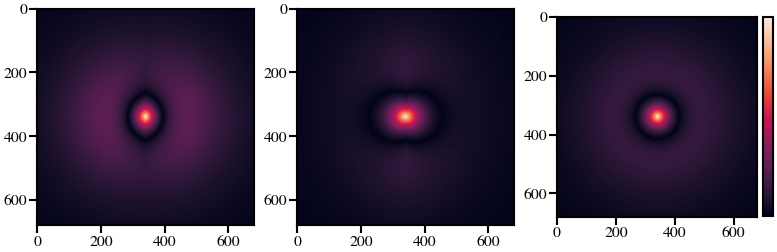

In [32]:
#Probability density
color_palette='rocket'
Spsi, (Sphi, Stheta, Spsi_3d) = compute_wavefunction(2, 0, 0, 1)
Pzpsi, (Pzphi, Pztheta, Pzpsi_3d) = compute_wavefunction(2, 1, -1, 1)
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 3, 1)
Ysp_1=1/np.sqrt(2)*(Spsi+Pzpsi)
Ysp_2=1/np.sqrt(2)*(Spsi-Pzpsi)
PT=Ysp_1+Ysp_2
prob_density_1 = compute_probability_density(Ysp_1)
prob_density_2 = compute_probability_density(Ysp_2)
prob_density = compute_probability_density(PT)
im = ax.imshow(np.sqrt(prob_density_1), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 3, 2)
im = ax.imshow(np.sqrt(prob_density_2), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 3, 3)
im = ax.imshow(np.sqrt(prob_density), cmap=sns.color_palette(color_palette, as_cmap=True))
cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_ticks([])


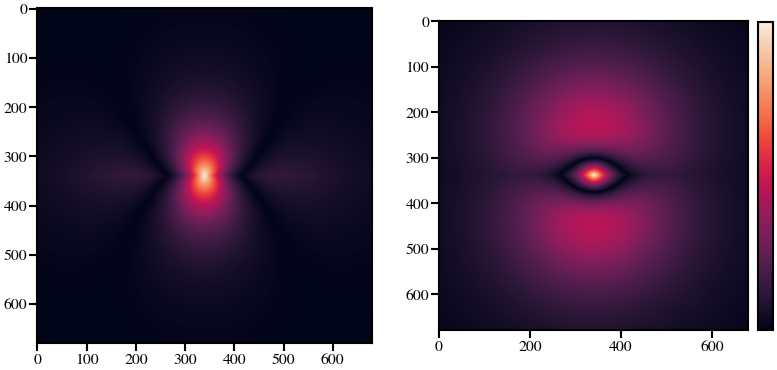

In [27]:
#Probability density
color_palette='rocket'
Spsi, (Sphi, Stheta, Spsi_3d) = compute_wavefunction(2, 0, 0, 1)
Pzpsi, (Pzphi, Pztheta, Pzpsi_3d) = compute_wavefunction(2, 1, 0, 1)
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 2, 1)
Ysp_1=1/np.sqrt(2)*(Spsi+Pzpsi)
Ysp_2=1/np.sqrt(2)*(Spsi-Pzpsi)
prob_density_1 = compute_probability_density(Ysp_1)
prob_density_2 = compute_probability_density(Ysp_2)
im = ax.imshow(np.sqrt(prob_density_1), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 2, 2)
im = ax.imshow(np.sqrt(prob_density_2), cmap=sns.color_palette(color_palette, as_cmap=True))
cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_ticks([])

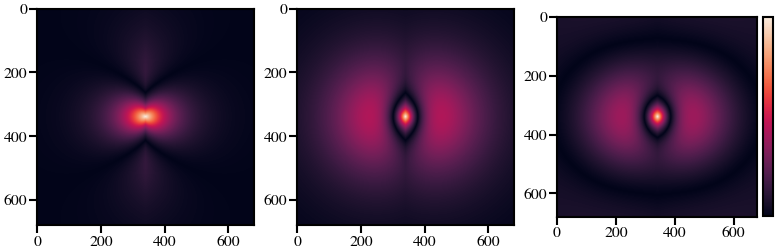

In [28]:
color_palette='rocket'
Spsi, (Sphi, Stheta, Spsi_3d) = compute_wavefunction(2, 0, 0, 1)
Pxpsi, (Pxphi, Pxtheta, Pxpsi_3d) = compute_wavefunction(2, 1, 1, 1)
Pypsi, (Pyphi, Pytheta, Pypsi_3d) = compute_wavefunction(2, 1, -1, 1)
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 3, 1)
Ysp2_1=1/np.sqrt(3)*(Spsi)+np.sqrt(2/3)*Pxpsi
prob_density_1=compute_probability_density(Ysp2_1)
image2=ax.imshow(np.sqrt(prob_density_1),cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 3, 2)
Ysp2_2=1/np.sqrt(3)*(Spsi)-1/np.sqrt(6)*Pxpsi+1/np.sqrt(2)*Pypsi
prob_density_2=compute_probability_density(Ysp2_2)
image3=ax.imshow(np.sqrt(prob_density_2),cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 3, 3)
Ysp2_2=1/np.sqrt(3)*(Spsi)-1/np.sqrt(6)*Pxpsi+1/np.sqrt(2)*Pypsi
prob_density_2=compute_probability_density(Ysp2_2)
image3=ax.imshow(np.sqrt(prob_density_3),cmap=sns.color_palette(color_palette, as_cmap=True))
cbar = plt.colorbar(image3, fraction=0.046, pad=0.03)
cbar.set_ticks([])

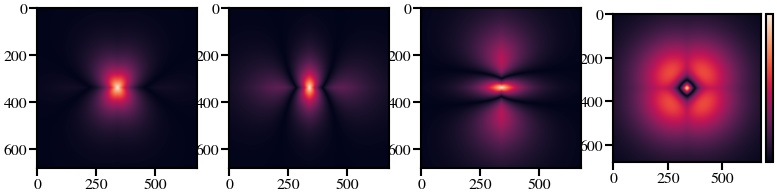

In [29]:
color_palette='rocket'
Spsi, (Sphi, Stheta, Spsi_3d) = compute_wavefunction(2, 0, 0, 1)
Pxpsi, (Pxphi, Pxtheta, Pxpsi_3d) = compute_wavefunction(2, 1, 1, 1)
Pypsi, (Pyphi, Pytheta, Pypsi_3d) = compute_wavefunction(2, 1, -1, 1)
Pzpsi, (Pzphi, Pztheta, zypsi_3d) = compute_wavefunction(2, 1, 0, 1)
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 4, 1)
Ysp3_1=1/2*(Spsi+Pxpsi+Pypsi+Pzpsi)
Ysp3_2=1/2*(Spsi-Pxpsi-Pypsi+Pzpsi)
Ysp3_3=1/2*(Spsi+Pxpsi-Pypsi-Pzpsi)
Ysp3_4=1/2*(Spsi-Pxpsi+Pypsi-Pzpsi)
prob_density_1 = compute_probability_density(Ysp3_1)
prob_density_2 = compute_probability_density(Ysp3_2)
prob_density_3 = compute_probability_density(Ysp3_3)
prob_density_4 = compute_probability_density(Ysp3_4)
im = ax.imshow(np.sqrt(prob_density_1), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 4, 2)
im = ax.imshow(np.sqrt(prob_density_2), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 4, 3)
im = ax.imshow(np.sqrt(prob_density_3), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 4, 4)
im = ax.imshow(np.sqrt(prob_density_4), cmap=sns.color_palette(color_palette, as_cmap=True))

cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_ticks([])

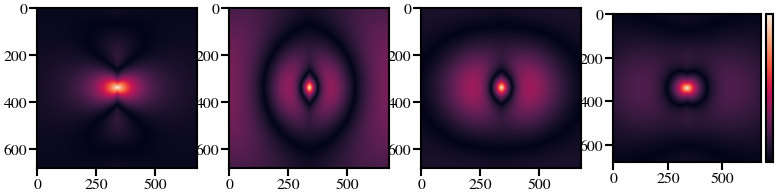

In [39]:
color_palette='rocket'
Spsi, (Sphi, Stheta, Spsi_3d) = compute_wavefunction(3, 0, 0, 1)
Pxpsi, (Pxphi, Pxtheta, Pxpsi_3d) = compute_wavefunction(3, 1, 1, 1)
Pypsi, (Pyphi, Pytheta, Pypsi_3d) = compute_wavefunction(3, 1, -1, 1)
Dx2y2psi, (Px2y2phi, Px2y2theta, Px2y2psi_3d) = compute_wavefunction(3, 2, 2, 1)
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 4, 1)
Ysp2d_1=1/2*Spsi+1/np.sqrt(2)*Pxpsi+1/2*Dx2y2psi
Ysp2d_2=1/2*Spsi-1/np.sqrt(2)*Pxpsi+1/2*Dx2y2psi
Ysp2d_3=1/2*Spsi+1/np.sqrt(2)*Pypsi-1/2*Dx2y2psi
Ysp2d_4=1/2*Spsi-1/np.sqrt(2)*Pypsi-1/2*Dx2y2psi
prob_density_1 = compute_probability_density(Ysp2d_1)
prob_density_2 = compute_probability_density(Ysp2d_2)
prob_density_3 = compute_probability_density(Ysp2d_3)
prob_density_4 = compute_probability_density(Ysp2d_4)
im = ax.imshow(np.sqrt(prob_density_1), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 4, 2)
im = ax.imshow(np.sqrt(prob_density_2), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 4, 3)
im = ax.imshow(np.sqrt(prob_density_3), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 4, 4)
im = ax.imshow(np.sqrt(prob_density_4), cmap=sns.color_palette(color_palette, as_cmap=True))

cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_ticks([])

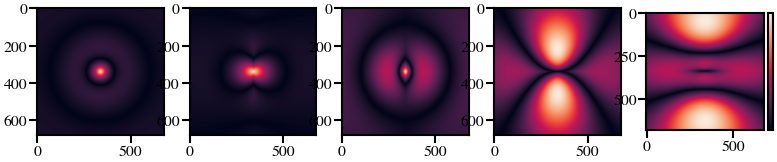

In [41]:
color_palette='rocket'
Spsi, (Sphi, Stheta, Spsi_3d) = compute_wavefunction(3, 0, 0, 1)
Pxpsi, (Pxphi, Pxtheta, Pxpsi_3d) = compute_wavefunction(3, 1, 1, 1)
Pypsi, (Pyphi, Pytheta, Pypsi_3d) = compute_wavefunction(3, 1, -1, 1)
Pzpsi, (Pzphi, Pztheta, Pzpsi_3d) = compute_wavefunction(3, 1, 0, 1)
Dz2psi, (Dz2phi, Dz2theta, Dz2psi_3d) = compute_wavefunction(3, 2, 0, 1)
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 5, 1)
Ysp3d_1=1/np.sqrt(3)*Spsi+1/np.sqrt(6)*Pxpsi+1/np.sqrt(2)*Pypsi
Ysp3d_2=1/np.sqrt(3)*Spsi+1/np.sqrt(6)*Pxpsi-1/np.sqrt(2)*Pypsi
Ysp3d_3=1/np.sqrt(3)*Spsi-np.sqrt(2/3)*Pxpsi
Ysp3d_4=1/np.sqrt(2)*Dz2psi+1/np.sqrt(2)*Pzpsi
Ysp3d_5=1/np.sqrt(2)*Dz2psi-1/np.sqrt(2)*Pzpsi
prob_density_1 = compute_probability_density(Ysp3d_1)
prob_density_2 = compute_probability_density(Ysp3d_2)
prob_density_3 = compute_probability_density(Ysp3d_3)
prob_density_4 = compute_probability_density(Ysp3d_4)
prob_density_5 = compute_probability_density(Ysp3d_5)

im = ax.imshow(np.sqrt(prob_density_1), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 5, 2)
im = ax.imshow(np.sqrt(prob_density_2), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 5, 3)
im = ax.imshow(np.sqrt(prob_density_3), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 5, 4)
im = ax.imshow(np.sqrt(prob_density_4), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 5, 5)
im = ax.imshow(np.sqrt(prob_density_5), cmap=sns.color_palette(color_palette, as_cmap=True))

cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_ticks([])

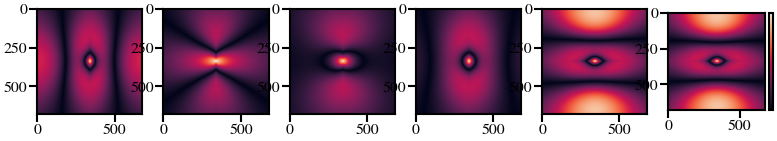

In [42]:
color_palette='rocket'
Spsi, (Sphi, Stheta, Spsi_3d) = compute_wavefunction(3, 0, 0, 1)
Pxpsi, (Pxphi, Pxtheta, Pxpsi_3d) = compute_wavefunction(3, 1, 1, 1)
Pypsi, (Pyphi, Pytheta, Pypsi_3d) = compute_wavefunction(3, 1, -1, 1)
Pzpsi, (Pzphi, Pztheta, Pzpsi_3d) = compute_wavefunction(3, 1, 0, 1)
Dz2psi, (Dz2phi, Dz2theta, Dz2psi_3d) = compute_wavefunction(3, 2, 0, 1)
Dx2y2psi, (Px2y2phi, Px2y2theta, Px2y2psi_3d) = compute_wavefunction(3, 2, 2, 1)
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 6, 1)
Ysp3d2_1=1/np.sqrt(6)*Spsi-1/np.sqrt(2)*Pxpsi-1/np.sqrt(12)*Dz2psi+1/2*Dx2y2psi
Ysp3d2_2=1/np.sqrt(6)*Spsi+1/np.sqrt(2)*Pxpsi-1/np.sqrt(12)*Dz2psi+1/2*Dx2y2psi
Ysp3d2_3=1/np.sqrt(6)*Spsi-1/np.sqrt(2)*Pypsi-1/np.sqrt(12)*Dz2psi-1/2*Dx2y2psi
Ysp3d2_4=1/np.sqrt(6)*Spsi+1/np.sqrt(2)*Pypsi-1/np.sqrt(12)*Dz2psi-1/2*Dx2y2psi
Ysp3d2_5=1/np.sqrt(6)*Spsi-1/np.sqrt(2)*Pzpsi+1/np.sqrt(3)*Dz2psi
Ysp3d2_6=1/np.sqrt(6)*Spsi+1/np.sqrt(2)*Pzpsi+1/np.sqrt(3)*Dz2psi
prob_density_1 = compute_probability_density(Ysp3d2_1)
prob_density_2 = compute_probability_density(Ysp3d2_2)
prob_density_3 = compute_probability_density(Ysp3d2_3)
prob_density_4 = compute_probability_density(Ysp3d2_4)
prob_density_5 = compute_probability_density(Ysp3d2_5)
prob_density_6 = compute_probability_density(Ysp3d2_6)

im = ax.imshow(np.sqrt(prob_density_1), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 6, 2)
im = ax.imshow(np.sqrt(prob_density_2), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 6, 3)
im = ax.imshow(np.sqrt(prob_density_3), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 6, 4)
im = ax.imshow(np.sqrt(prob_density_4), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 6, 5)
im = ax.imshow(np.sqrt(prob_density_5), cmap=sns.color_palette(color_palette, as_cmap=True))
ax = fig.add_subplot(1, 6, 6)
im = ax.imshow(np.sqrt(prob_density_5), cmap=sns.color_palette(color_palette, as_cmap=True))

cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_ticks([])